<h2 align='center'>Coffee Shop Sales EDA</h2>

<h3 align='right'>~By: Dhinesh Kumar</h3>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Reading coffee shop sales.csv file
df=pd.read_csv(r"Coffee Shop Sales.csv")

In [3]:
#displaying all columns in file
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [4]:
#deleting columns 'transaction_id','product_type','product_detail'.
df.drop(['transaction_id','product_type','product_detail'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   transaction_time  149116 non-null  object 
 2   transaction_qty   149116 non-null  int64  
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   unit_price        149116 non-null  float64
 7   product_category  149116 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.1+ MB


In [6]:
#creating new column amount
df['amount']=df['unit_price']*df['transaction_qty']

In [7]:
df[['unit_price','amount']].describe()

,unit_price,amount
count,149116.000000,149116.000000
mean,3.382219,4.686367
std,2.658723,4.227099
min,0.800000,0.800000
25%,2.500000,3.000000
50%,3.000000,3.750000
75%,3.750000,6.000000
max,45.000000,360.000000


In [8]:
#displaying first 5 values in file
df.head(5)

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,amount
0,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,6.0
1,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,6.2
2,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,9.0
3,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,2.0
4,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,6.2


In [9]:
#displaying last 5 values in file
df.tail(5)

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,amount
149111,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,5.00
149112,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,6.00
149113,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,3.00
149114,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,3.75
149115,6/30/2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,1.60


In [10]:
#Total amount and quantity
total_amount=df['amount'].sum()
total_qty=df['transaction_qty'].sum()

print(f"Total Amount  : {round(total_amount,2)}")
print(f"Total Qantity : {total_qty}")

Total Amount  : 698812.33
Total Qantity : 214470


In [11]:
#Count of Stores in each locations
stores=df['store_location'].value_counts().reset_index()
stores

,store_location,count
0,Hell's Kitchen,50735
1,Astoria,50599
2,Lower Manhattan,47782


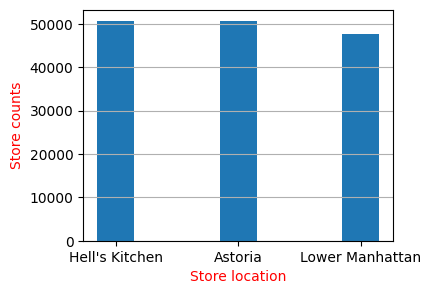

In [12]:
plt.figure(figsize=(4,3))
plt.bar(stores['store_location'],stores['count'],width=0.3)
plt.xlabel('Store location',color='red')
plt.ylabel('Store counts',color='red')
plt.grid(axis='y')
plt.show()

In [13]:
#creating columns year, month, day
df['transaction_date']=pd.to_datetime(df['transaction_date'])
df['year']=df['transaction_date'].dt.year
df['month']=df['transaction_date'].dt.month
df['day']=df['transaction_date'].dt.day

In [14]:
#creating column hour
def hour(x):
    x=x.split(':')
    x=x[0]
    return x
df['hour']=df['transaction_time'].apply(hour)

In [15]:
#removing columns transaction_date, transaction_time
df.drop(['transaction_date','transaction_time'],axis=1,inplace=True)

In [16]:
#first 5 rows
df.head(5)

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,amount,year,month,day,hour
0,2,5,Lower Manhattan,32,3.0,Coffee,6.0,2023,1,1,7
1,2,5,Lower Manhattan,57,3.1,Tea,6.2,2023,1,1,7
2,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,9.0,2023,1,1,7
3,1,5,Lower Manhattan,22,2.0,Coffee,2.0,2023,1,1,7
4,2,5,Lower Manhattan,57,3.1,Tea,6.2,2023,1,1,7


In [17]:
#total amount by stores in each location
store_amount=df.groupby('store_location')[['amount']].sum().reset_index()
store_amount

,store_location,amount
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


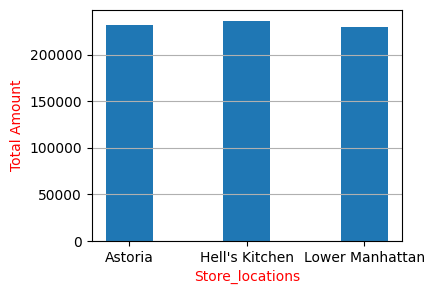

In [18]:
plt.figure(figsize=(4,3))
plt.bar(store_amount['store_location'],store_amount['amount'],width=0.4)
plt.grid(axis='y')
plt.xlabel('Store_locations',color='red')
plt.ylabel('Total Amount',color='red')
plt.show()

In [19]:
#total amount by each category of products
amountByProduct=df.groupby('product_category')[['amount']].sum().reset_index()
amountByProduct

,product_category,amount
0,Bakery,82315.64
1,Branded,13607.00
2,Coffee,269952.45
3,Coffee beans,40085.25
4,Drinking Chocolate,72416.00
5,Flavours,8408.80
6,Loose Tea,11213.60
7,Packaged Chocolate,4407.64
8,Tea,196405.95


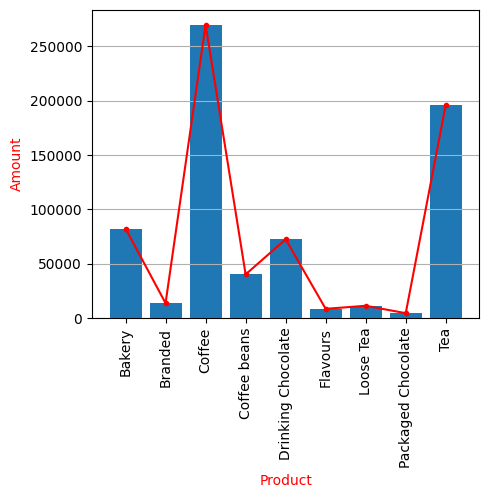

In [20]:
#bar chart of amount by each category of products
plt.figure(figsize=(5,4))
plt.bar(amountByProduct['product_category'],amountByProduct['amount'])
plt.plot(amountByProduct['amount'],color='red',marker='.')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Product',color='red')
plt.ylabel('Amount',color='red')
plt.show()

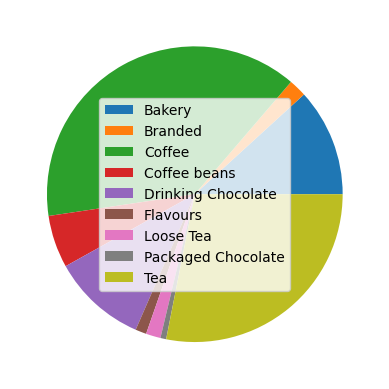

In [21]:
#pie chart of amount by each category of products
plt.pie(amountByProduct['amount'])
plt.legend(labels=amountByProduct['product_category'])
plt.show()

In [22]:
#quantity sold and amount on each month
salesByMonth=df.groupby('month')[['transaction_qty','amount']].sum().reset_index()
salesByMonth

,month,transaction_qty,amount
0,1,24870,81677.74
1,2,23550,76145.19
2,3,30406,98834.68
3,4,36469,118941.08
4,5,48233,156727.76
5,6,50942,166485.88


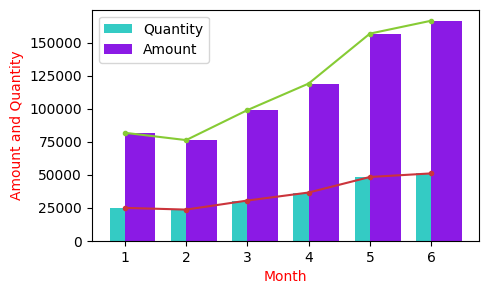

In [23]:
c=np.arange(len(salesByMonth['month']))
plt.figure(figsize=(5,3))
plt.xticks(c,salesByMonth['month'])
plt.bar(c,salesByMonth['transaction_qty'],width=0.5,color='#34CBC4',label='Quantity')
plt.bar(c+0.25,salesByMonth['amount'],width=0.5,color='#8B1AE5',label='Amount')
plt.plot(salesByMonth['transaction_qty'],color='#CB343B',marker='.')
plt.plot(salesByMonth['amount'],color='#86CB34',marker='.')
plt.xlabel('Month',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [24]:
amountByhour=df.groupby('hour')[['transaction_qty','amount']].sum()
highestSalesTime=amountByhour.nlargest(5,'transaction_qty').reset_index()
highestSalesTime

,hour,transaction_qty,amount
0,10,26713,88673.39
1,9,25370,85169.53
2,8,25197,82699.87
3,7,19449,63526.47
4,11,14035,46319.14


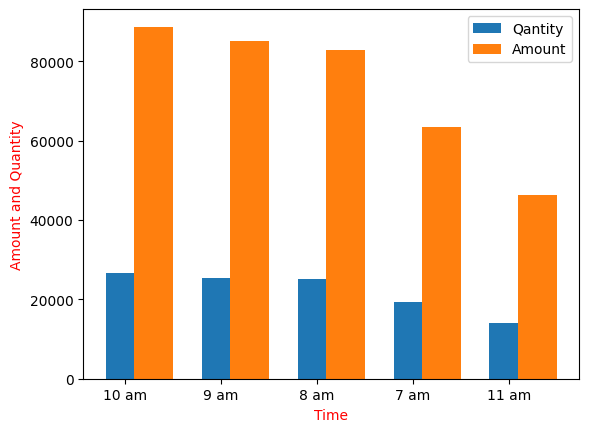

In [25]:
c=np.arange(len(highestSalesTime['hour']))
plt.xticks(c,highestSalesTime['hour']+' am')
plt.bar(c,highestSalesTime['transaction_qty'],width=0.4,label='Qantity')
plt.bar(c+0.3,highestSalesTime['amount'],width=0.4,label='Amount')
plt.xlabel('Time',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [26]:
#stores in location : "Astoria"
data1=df.where(df['store_location']=='Astoria')
data1.dropna(inplace=True)

In [27]:
#amount and quantity by product category at Astoria
amountByProduct=data1.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,7496.0,26599.75
1,Branded,279.0,5457.00
2,Coffee,29655.0,89744.30
3,Coffee beans,502.0,10219.20
4,Drinking Chocolate,6351.0,26335.25
5,Flavours,2206.0,1764.80
6,Loose Tea,344.0,3194.00
7,Packaged Chocolate,110.0,1089.71
8,Tea,24048.0,67839.90


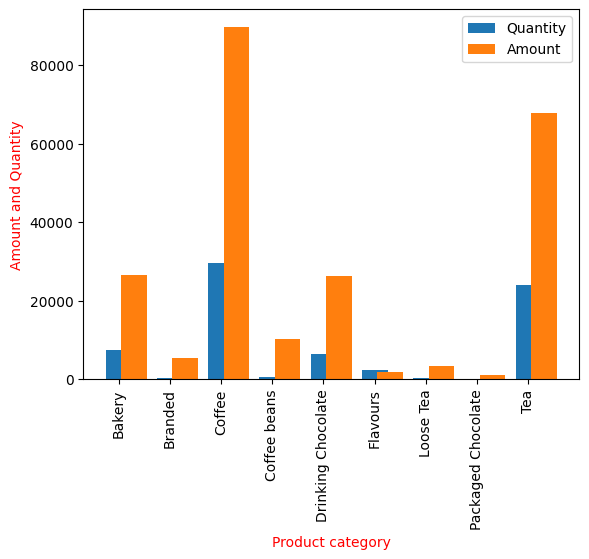

In [28]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity')
plt.bar(c+0.3,amountByProduct['amount'],width=0.5,label='Amount')
plt.xlabel('Product category',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [29]:
#stores in location : "Hell's Kitchen"
data2=df.where(df['store_location']=="Hell's Kitchen")
data2.dropna(inplace=True)

In [30]:
#amount and quantity by product category at Hell's Kitchen
amountByProduct=data2.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,7678.0,27386.95
1,Branded,119.0,1942.00
2,Coffee,30220.0,91222.65
3,Coffee beans,790.0,18635.10
4,Drinking Chocolate,5672.0,23586.25
5,Flavours,3596.0,2876.80
6,Loose Tea,485.0,4461.35
7,Packaged Chocolate,197.0,1698.77
8,Tea,22980.0,64701.30


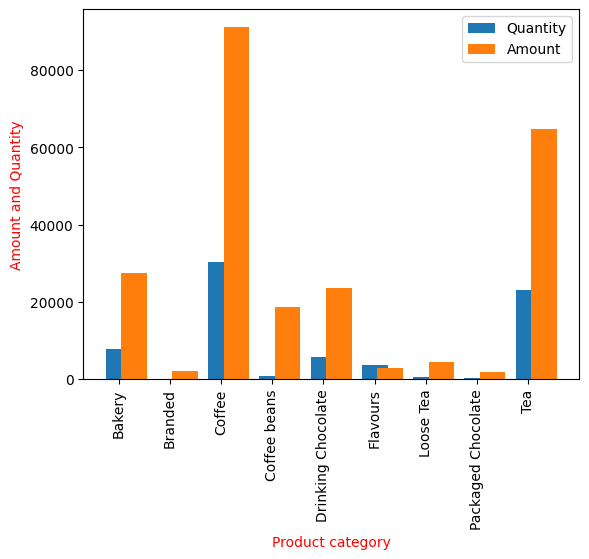

In [31]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity')
plt.bar(c+0.3,amountByProduct['amount'],width=0.5,label='Amount')
plt.xlabel('Product category',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

In [32]:
#stores in location : "Lower Manhattan"
data3=df.where(df['store_location']=="Lower Manhattan")
data3.dropna(inplace=True)

In [33]:
#amount and quantity by product category at Lower Manhattan
amountByProduct=data3.groupby('product_category')[['transaction_qty','amount']].sum().reset_index()
amountByProduct

,product_category,transaction_qty,amount
0,Bakery,8040.0,28328.94
1,Branded,378.0,6208.00
2,Coffee,29375.0,88985.50
3,Coffee beans,536.0,11230.95
4,Drinking Chocolate,5434.0,22494.50
5,Flavours,4709.0,3767.20
6,Loose Tea,381.0,3558.25
7,Packaged Chocolate,180.0,1619.16
8,Tea,22709.0,63864.75


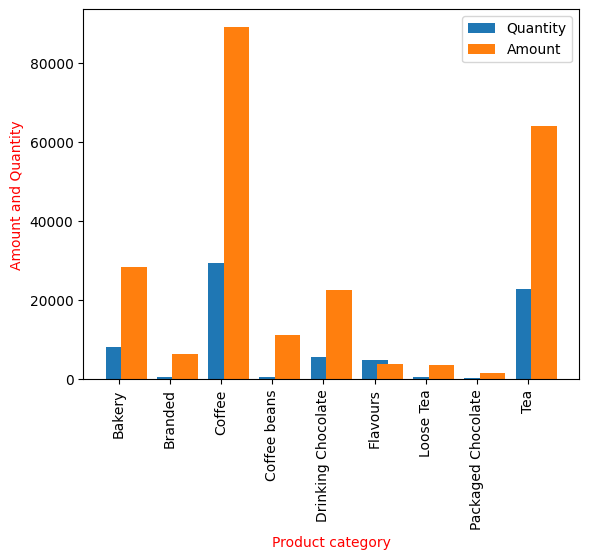

In [34]:
c=np.arange(len(amountByProduct['product_category']))
plt.xticks(c,amountByProduct['product_category'],rotation=90)
plt.bar(c,amountByProduct['transaction_qty'],width=0.5,label='Quantity')
plt.bar(c+0.3,amountByProduct['amount'],width=0.5,label='Amount')
plt.xlabel('Product category',color='red')
plt.ylabel('Amount and Quantity',color='red')
plt.legend()
plt.show()

<h3>Insights from EDA</h3>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

</head>
<body>
    <ol>
        <li>Total amount earned is Rs: 6,98,812 </li>
        <li>Total Quantity sold is 2,14,470 </li>
        <li>Highest amount is earned through store location Hell's Kitchen and amount earned is Rs: 2,36,511 </li>
        <li>Highly sold product is coffee and earned Rs: 2,69,952 </li>
        <li>Least sold product is packaged chocolate and earned Rs: 4,407 </li>
        <li>Products are highly sold during month of June </li>
        <li>Products are highly sold during 10am, 9am, 8am, 7am and 11am </li>
    </ol>
    <h4>Location : Astoria</h4>
    <ol>
        <li>Highly sold product is coffee and earned amount is Rs: 89,744.30 </li>
        <li>Least sold product is packaged chocolate and earned amount is Rs: 1,089.71</li>
    </ol>
    <h4>Location : Hell's Kitchen</h4>
    <ol>
        <li>Highly sold product is coffee and earned amount is Rs: 91,222.65 </li>
        <li>Least sold product is packaged chocolate and earned amount is Rs: 1698.77</li>
    </ol>
    <h4>Location : Lower Manhattan</h4>
    <ol>
        <li>Highly sold product is coffee and earned amount is Rs: 88,985.50 </li>
        <li>Least sold product is packaged chocolate and earned amount is Rs: 1619.16</li>
    </ol>
</body>
</html>